In [11]:
from utils import get_data
import baseline_models
import packed_models

import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn

In [12]:
train_loader, val_loader = get_data(batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
def show_example(data_loader):
    # Show one example image
    idx = np.random.randint(0, len(data_loader.dataset))
    img, label = data_loader.dataset[idx]
    temp_img = np.transpose(img, (1, 2, 0))
    plt.imshow(temp_img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

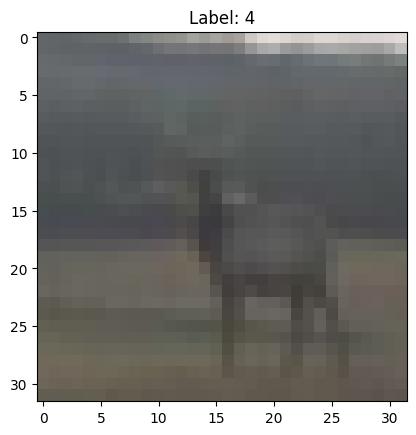

In [14]:
show_example(train_loader)

In [15]:
limit = 1024

train_loader.dataset.data = train_loader.dataset.data[:limit]
train_loader.dataset.targets = train_loader.dataset.targets[:limit]

In [17]:
def train_cycle(model):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(10):
        for i, (img, label) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            if i % 10 == 0:
                print(f'Epoch: {epoch}, Step: {i}, Loss: {loss.item()}')

        val_loss = 0
        val_acc = 0
        for i, (img, label) in enumerate(val_loader):
            output = model(img)
            loss = criterion(output, label)
            val_loss += loss.item()
            val_acc += (output.argmax(1) == label).sum().item()

        print(f'Epoch: {epoch}, Val Loss: {val_loss / len(val_loader)}, Val Acc: {val_acc / len(val_loader.dataset)}')

In [18]:
baseline_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
baseline_model.fc = nn.Linear(512, 10)

packed_model = packed_models.PackedResNet18(alpha=2, gamma=2, n_estimators=4)
baseline_model_scratch = baseline_models.ResNet18()

Using cache found in /home/tomas/.cache/torch/hub/pytorch_vision_v0.10.0
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [8]:
train_cycle(packed_model)

Epoch: 0, Step: 0, Loss: 3.6571130752563477
Epoch: 0, Step: 10, Loss: 2.02120304107666
Epoch: 0, Step: 20, Loss: 2.1950595378875732
Epoch: 0, Step: 30, Loss: 2.14241623878479
Epoch: 0, Val Loss: 2.0267255249114844, Val Acc: 0.287
Epoch: 1, Step: 0, Loss: 1.8916820287704468
Epoch: 1, Step: 10, Loss: 1.6701878309249878
Epoch: 1, Step: 20, Loss: 1.7857081890106201
Epoch: 1, Step: 30, Loss: 1.7513874769210815
Epoch: 1, Val Loss: 1.938359221330466, Val Acc: 0.3189
Epoch: 2, Step: 0, Loss: 1.2239644527435303
Epoch: 2, Step: 10, Loss: 1.2445398569107056
Epoch: 2, Step: 20, Loss: 1.462225317955017
Epoch: 2, Step: 30, Loss: 1.3788169622421265
Epoch: 2, Val Loss: 1.9858497362167309, Val Acc: 0.3293
Epoch: 3, Step: 0, Loss: 1.2991255521774292
Epoch: 3, Step: 10, Loss: 1.1253775358200073
Epoch: 3, Step: 20, Loss: 1.422570824623108
Epoch: 3, Step: 30, Loss: 1.6139016151428223
Epoch: 3, Val Loss: 2.0146959722994233, Val Acc: 0.3553
Epoch: 4, Step: 0, Loss: 0.8912261128425598
Epoch: 4, Step: 10, Loss

In [9]:
train_cycle(model_test)

Epoch: 0, Step: 0, Loss: 2.634988784790039
Epoch: 0, Step: 10, Loss: 2.4519782066345215
Epoch: 0, Step: 20, Loss: 2.4165384769439697
Epoch: 0, Step: 30, Loss: 1.9738125801086426
Epoch: 0, Val Loss: 1.991682044233377, Val Acc: 0.2804
Epoch: 1, Step: 0, Loss: 1.977285385131836
Epoch: 1, Step: 10, Loss: 1.7999558448791504
Epoch: 1, Step: 20, Loss: 1.7588633298873901
Epoch: 1, Step: 30, Loss: 1.928396463394165
Epoch: 1, Val Loss: 1.8548218347013188, Val Acc: 0.3249
Epoch: 2, Step: 0, Loss: 1.6600362062454224
Epoch: 2, Step: 10, Loss: 1.8478926420211792
Epoch: 2, Step: 20, Loss: 1.3961046934127808
Epoch: 2, Step: 30, Loss: 1.9040781259536743
Epoch: 2, Val Loss: 1.914639487434119, Val Acc: 0.307
Epoch: 3, Step: 0, Loss: 1.533910870552063
Epoch: 3, Step: 10, Loss: 1.5428396463394165
Epoch: 3, Step: 20, Loss: 1.2953523397445679
Epoch: 3, Step: 30, Loss: 1.7236407995224
Epoch: 3, Val Loss: 1.894187355193848, Val Acc: 0.3562
Epoch: 4, Step: 0, Loss: 1.3304134607315063
Epoch: 4, Step: 10, Loss: 1

In [10]:
train_cycle(baseline_model)

Epoch: 0, Step: 0, Loss: 2.4951224327087402
Epoch: 0, Step: 10, Loss: 2.1428680419921875
Epoch: 0, Step: 20, Loss: 2.2575156688690186
Epoch: 0, Step: 30, Loss: 2.174901008605957
Epoch: 0, Val Loss: 2.121137617114253, Val Acc: 0.2597
Epoch: 1, Step: 0, Loss: 1.4694243669509888
Epoch: 1, Step: 10, Loss: 1.5449670553207397
Epoch: 1, Step: 20, Loss: 1.443644404411316
Epoch: 1, Step: 30, Loss: 1.6418302059173584
Epoch: 1, Val Loss: 1.868188618090206, Val Acc: 0.3391
Epoch: 2, Step: 0, Loss: 1.2378078699111938
Epoch: 2, Step: 10, Loss: 1.1071354150772095
Epoch: 2, Step: 20, Loss: 1.5197362899780273
Epoch: 2, Step: 30, Loss: 1.6208233833312988
Epoch: 2, Val Loss: 2.056788565251774, Val Acc: 0.3089
Epoch: 3, Step: 0, Loss: 1.642743468284607
Epoch: 3, Step: 10, Loss: 1.2412389516830444
Epoch: 3, Step: 20, Loss: 1.1928529739379883
Epoch: 3, Step: 30, Loss: 2.0327889919281006
Epoch: 3, Val Loss: 2.1438964034040895, Val Acc: 0.3333
Epoch: 4, Step: 0, Loss: 0.8597158789634705
Epoch: 4, Step: 10, Lo